In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение, обработка и исследование данных

In [3]:
#data = pd.read_csv(os.path.join(data_root, 'cardio_train.csv'),sep = r';')
data = pd.read_excel('cardio_a.xlsx',header=1)
data = data.drop(columns='№ п/п')
data.head(5)

,Пол,Возраст,Рост,Вес,ИМТ,S тела,систол. АД,ЧСС,Психотип D,Тревога HADS,...,"АЧТВ-3, с","АЧТВ-4, с","АТ3-1, %","АТ3-2, %","АТ3-3, %","АТ3-4, %","FW-1,%","FW-2,%","FW-3,%","FW-4,%"
0,м,75,1.64,80,29.744200,1.88,190,90,0.0,0.0,...,31.2,NaN,100.72,86.59,116.31,NaN,120.0,120.00,293.0,NaN
1,м,49,1.76,130,41.967975,2.41,140,100,0.0,0.0,...,34.0,36.1,100.55,101.63,127.76,99.58,120.0,115.99,90.0,94.0
2,м,54,1.62,70,26.672763,1.76,137,86,0.0,0.0,...,55.2,46.9,85.45,95.26,107.71,107.90,120.0,120.00,100.0,88.0
3,м,33,1.76,90,29.054752,2.07,128,76,0.0,0.0,...,35.1,38.6,120.83,139.80,123.56,143.50,120.0,120.00,100.0,177.0
4,м,52,1.68,90,31.887755,2.02,160,105,NaN,NaN,...,57.0,39.3,98.28,130.80,126.05,122.00,120.0,120.00,113.0,162.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Columns: 582 entries, Пол to FW-4,%
dtypes: datetime64[ns](14), float64(504), int64(24), object(40)
memory usage: 1.2+ MB


In [5]:
data.duplicated().sum() # Удаление повторяющихся значений

0

In [6]:
data.isna().sum()

Пол          0
Возраст      0
Рост         0
Вес          0
ИМТ          0
            ..
АТ3-4, %    40
FW-1,%       0
FW-2,%      15
FW-3,%      28
FW-4,%      38
Length: 582, dtype: int64

In [7]:
from scipy.stats import shapiro
stat,p = shapiro(data['Возраст'])
p

0.11948489397764206

Посмотрим на значения

In [8]:
data.describe()

,Возраст,Рост,Вес,ИМТ,S тела,систол. АД,ЧСС,Психотип D,Тревога HADS,Депрессия HADS,...,"АЧТВ-3, с","АЧТВ-4, с","АТ3-1, %","АТ3-2, %","АТ3-3, %","АТ3-4, %","FW-1,%","FW-2,%","FW-3,%","FW-4,%"
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,106.000000,106.000000,106.000000,...,239.000000,225.000000,262.000000,250.000000,239.000000,223.000000,263.000000,248.000000,235.000000,225.000000
mean,55.870722,1.706084,83.779468,28.741989,1.972825,138.353612,79.901141,0.037736,0.603774,0.198113,...,37.976151,36.630222,107.951870,107.123640,110.133891,114.412422,203.800875,201.108629,182.051064,180.142267
std,8.619082,0.082658,17.020106,5.308498,0.222104,25.220411,17.696274,0.191462,2.211137,1.072778,...,19.343485,6.110980,18.722661,15.778035,14.135606,13.437720,91.582057,81.741001,65.127796,138.989873
min,31.000000,1.490000,47.000000,17.301038,1.431685,60.000000,42.000000,0.000000,0.000000,0.000000,...,22.400000,25.000000,0.000000,35.900000,60.000000,78.700000,2.450000,59.000000,70.000000,63.000000
25%,50.000000,1.650000,70.000000,24.784577,1.819059,122.000000,68.000000,0.000000,0.000000,0.000000,...,33.000000,32.700000,97.895000,98.132500,101.605000,105.000000,129.000000,135.000000,135.000000,124.000000
50%,55.000000,1.700000,83.000000,28.373702,1.967796,137.000000,78.000000,0.000000,0.000000,0.000000,...,35.600000,35.700000,110.580000,108.015000,111.400000,115.000000,191.000000,191.500000,175.000000,163.000000
75%,62.000000,1.760000,92.500000,31.668233,2.097120,154.000000,90.000000,0.000000,0.000000,0.000000,...,39.000000,38.900000,119.400000,117.510000,120.000000,122.000000,256.190000,245.000000,213.500000,200.000000
max,75.000000,1.980000,150.000000,47.225502,2.872281,220.000000,149.000000,1.000000,11.000000,9.000000,...,240.000000,75.800000,154.200000,148.700000,141.880000,152.000000,500.000000,500.000000,407.000000,2012.000000


Посмотрим сколько данных выходят за три сигмы по значениям ИМТ и давления.

In [9]:
from scipy import stats
data[(np.abs(stats.zscore(data[['ИМТ','систол. АД','ЧСС']])) > 3)]

,Пол,Возраст,Рост,Вес,ИМТ,S тела,систол. АД,ЧСС,Психотип D,Тревога HADS,...,"АЧТВ-3, с","АЧТВ-4, с","АТ3-1, %","АТ3-2, %","АТ3-3, %","АТ3-4, %","FW-1,%","FW-2,%","FW-3,%","FW-4,%"
48,ж,62,1.63,85,31.992171,1.940000,109,149,1.0,0.0,...,31.0,31.7,112.00,101.69,100.0,152.00,164.0,158.0,155.0,197.0
115,м,72,1.58,85,34.049031,1.900000,60,44,NaN,NaN,...,42.3,39.9,76.73,73.41,70.0,116.08,226.0,230.0,207.0,238.0
141,ж,53,1.54,112,47.225502,2.188861,140,78,0.0,8.0,...,31.0,35.1,95.70,92.00,90.0,104.60,185.0,170.0,155.0,198.0
151,м,53,1.82,90,27.170632,2.133073,220,128,NaN,NaN,...,37.0,34.6,118.16,122.50,120.0,126.30,314.0,310.0,305.0,151.0
210,ж,58,1.49,104,46.844737,2.074716,150,74,0.0,7.0,...,27.8,31.2,112.00,110.00,112.0,105.00,368.0,341.0,300.0,236.0


Можно удалить эти значения но пока не будем.



In [10]:
#data = data.drop(data[(np.abs(stats.zscore(data[['ИМТ','систол. АД','ЧСС']])) > 3)].index)
#data.describe()

Для начала посмотрим на госпитальные исходы - оставим только нахождение в больнице. Введем общую таргетную переменную - названия составляющих ее переменных говорят сами за себя.

In [11]:
data = data[data.columns[:221]]
data.head()

,Пол,Возраст,Рост,Вес,ИМТ,S тела,систол. АД,ЧСС,Психотип D,Тревога HADS,...,Тромбоз стента/ шунта,Дата.2,НРС,Повторная реваскуляризация (ЧКВ/АКШ),Дата.3,ОНМК,дата,ВЧ-кровотечение,Дата.4,ЖКТ-кровотечение
0,м,75,1.64,80,29.744200,1.88,190,90,0.0,0.0,...,0,NaT,0.0,0,NaT,0,NaT,0,NaN,1
1,м,49,1.76,130,41.967975,2.41,140,100,0.0,0.0,...,0,NaT,0.0,0,NaT,0,NaT,0,NaN,0
2,м,54,1.62,70,26.672763,1.76,137,86,0.0,0.0,...,0,NaT,0.0,0,NaT,0,NaT,0,NaN,0
3,м,33,1.76,90,29.054752,2.07,128,76,0.0,0.0,...,0,NaT,0.0,0,NaT,0,NaT,0,NaN,0
4,м,52,1.68,90,31.887755,2.02,160,105,NaN,NaN,...,0,NaT,0.0,0,NaT,0,NaT,0,NaN,0


In [12]:
data['target'] = ((data['Смерть'] + data['Реинфаркт'] + data['Тромбоз стента/ шунта'] 
                   + data['ОНМК'] + data['ВЧ-кровотечение'] + data['ЖКТ-кровотечение'])>0)*1

Корреляция Пирсона между признаками, целевой переменной.

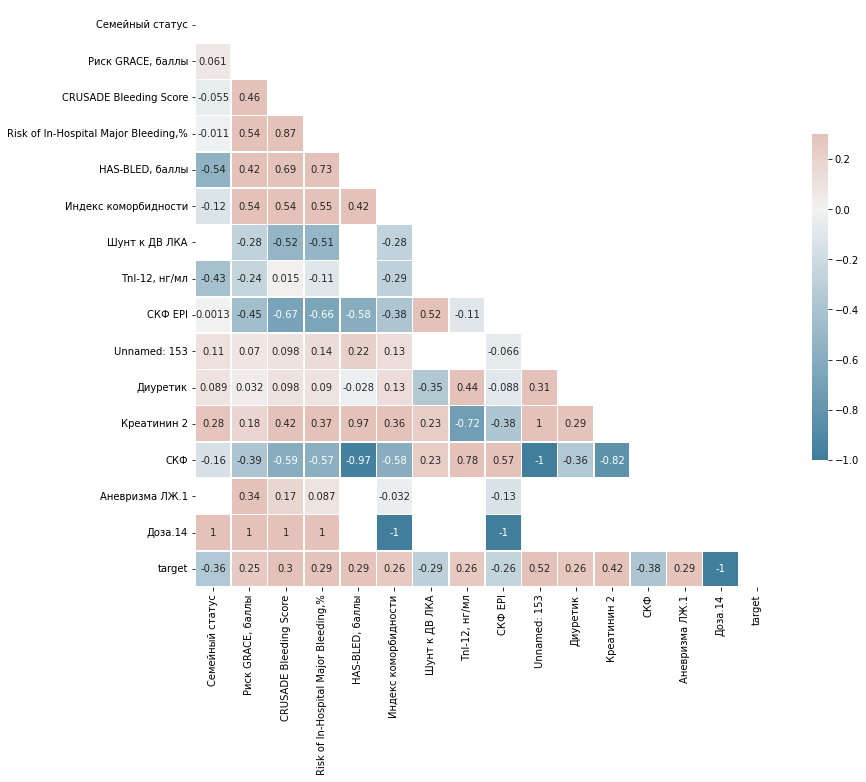

In [13]:
corr = data.drop(columns=['Смерть','Реинфаркт','Тромбоз стента/ шунта','ОНМК','ВЧ-кровотечение','ЖКТ-кровотечение']).corr()
corr = data[corr[np.abs(corr)>0.25]['target'].dropna().index.values].corr()#корреляция с таргетом по модулю больше чем 0.25 - оставляем только такие переменные
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [14]:
np.where(data.columns.values == 'Доза.14')

(array([190]),)

In [15]:
data.columns.values[189:191]#в данном случае доза с корр. -1 - доза Ингибитора абсорбции холестерина в кишечнике (не важно)

array(['Инг. абс. ХС в киш..1', 'Доза.14'], dtype=object)

Распределение по полу

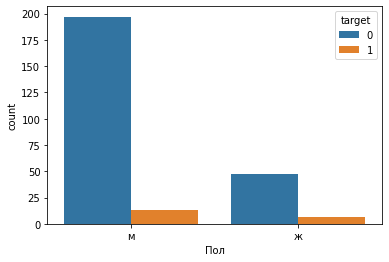

In [16]:
sns.countplot(x= data['Пол'].str.lower(),hue=data['target'])

Распределение целевой переменной по ИМТ

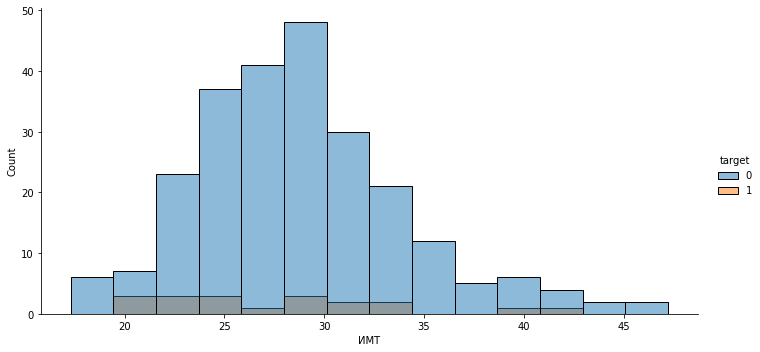

In [17]:
sns.displot(data=data,x='ИМТ',hue='target',aspect=2)

Распределение болезней по возрасту

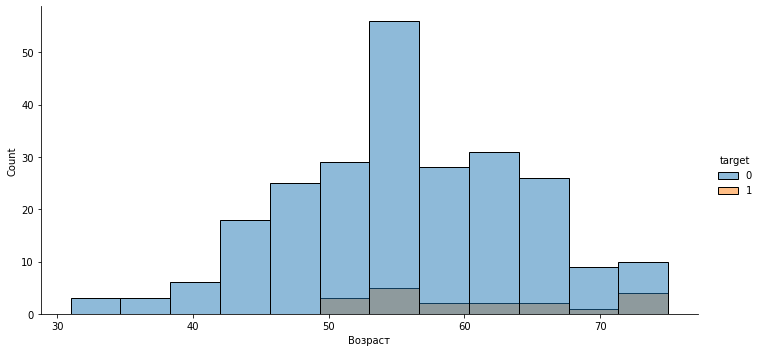

In [18]:
sns.displot(data=data,x='Возраст',hue='target',aspect=2)

Распределение целевой переменной

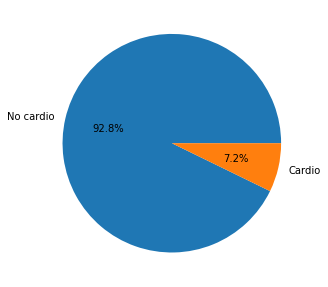

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
plt.tight_layout(pad=10)
ax.pie(x=data['target'].value_counts(), labels=['No cardio','Cardio'],autopct='%1.1f%%')
plt.show()

#Понижение размерности

Для начала опробуем алгоритм Relief.

In [20]:
!pip install ReliefF
from ReliefF import ReliefF

     |████████████████████████████████| 48 kB 2.1 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=f63c44c5cea1a63dbe4b1dbc666e6760cf62d4616763b8303a2d219a161a039e
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [21]:
data.columns.values[data.apply(lambda d: isinstance(d.values,object)).values]

array(['Пол', 'Возраст', 'Рост', 'Вес', 'ИМТ', 'S тела', 'систол. АД',
       'ЧСС', 'Психотип D', 'Тревога HADS', 'Депрессия HADS',
       'Ситуативная тревожность Спилберга (баллы)',
       'Личная тревожность Спилберга (баллы)',
       'Опросник депрессии Бека (баллы)',
       'Длительность проживания на Севере, лет', 'Курение', 'Алкоголь',
       'Шкала AUDIT (баллы)', 'Уровень образования', 'Семейный статус',
       'Давность болевого синдрома', 'Cегмент ST', 'Передняя стенка ЛЖ',
       'Задняя    стенка ЛЖ', 'Боковая  стенка ЛЖ', 'Класс Killip',
       'Риск GRACE, баллы', 'Риск GRACE   1-год, % ',
       'CRUSADE Bleeding Score', 'Risk of In-Hospital Major Bleeding,%',
       'пост-ИМ', 'пост-ОНМК', 'пост-ВЧ-кровоизлияние', 'пост-стент',
       'ФП', 'CHA2DS2VASc, баллы', 'HAS-BLED, баллы', 'ГБ', 'СД', 'НТГ',
       'МФА', 'Стадия ХБП по KDOQI /ERA', 'Ожирение, степень', 'ЯБЖ/ЭГ',
       'Анемия, степень', 'Индекс коморбидности', 'Наследственность',
       'прием терапии до ИМ'

In [22]:
data['Пол'] = [1 if x=='ж' else 0 for x in data['Пол'].str.lower()]#заменим на 0 и 1

In [23]:
data.drop(columns=['Смерть', 'Дата', 'Реинфаркт', 'Дата.1',
       'Тромбоз стента/ шунта', 'Дата.2', 'НРС',
       'Повторная реваскуляризация (ЧКВ/АКШ)', 'Дата.3', 'ОНМК', 'дата',
       'ВЧ-кровотечение', 'Дата.4', 'ЖКТ-кровотечение'],inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
cat_columns = ['Стадия ХБП по KDOQI /ERA','Инфаркт-зависимая артерия','TIMI в ИЗА','Стент.2','ЗМЖВ','Билирубин, мкмоль/л','Доза.6',
               'Доза.17']
l_enc = LabelEncoder()
for column in cat_columns:
  data[column] = l_enc.fit_transform(data[column].astype(str))

In [25]:
data.fillna(-1,inplace=True)

In [26]:
relief = ReliefF(n_neighbors=50,n_features_to_keep=25)
relief_data = data.drop(columns='target').values#все до клинических исходов
relief_target = data['target'].values
Relief_train = relief.fit_transform(relief_data, relief_target)
print(Relief_train)

[[  1.   1.   0. ...  -1.  -1.  -1.]
 [  1.   1.   0. ...  -1.  -1.  -1.]
 [  1.   1.   0. ...  -1.  -1.  -1.]
 ...
 [  1.   1.   0. ...  -1. 320.  -1.]
 [  1.   1.   0. ...  -1.  -1.  -1.]
 [ -1.  -1.   0. ...  -1.  -1.  -1.]]


In [27]:
data.columns.values[relief.top_features[0:25]]

array(['АСК.1', 'АСК', 'пост-ВЧ-кровоизлияние', 'Шкала AUDIT (баллы)',
       'E/A.1', 'Опросник депрессии Бека (баллы)',
       'Личная тревожность Спилберга (баллы)',
       'Ситуативная тревожность Спилберга (баллы)', 'Доза.14',
       'Инг. абс. ХС в киш.', 'Инг. абс. ХС в киш..1', 'Доза.3',
       'SYNTAX Score I', 'Стент', 'ТБКА', 'Антикоагулянт.1', 'Доза.21',
       'Аневризма ЛЖ', 'ГТЛ', 'ТnI-6, нг/мл', 'Тромбоз ЛЖ', 'E/A',
       'ТnT-6, нг/мл', 'Доза.1', 'HbA1c'], dtype=object)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve,f1_score

### Бустинг после отбора признаков

In [29]:
X = Relief_train
y = data['target'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12,shuffle=True)

In [31]:
!pip install catboost
import catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.6 MB 46 kB/s 


In [32]:
boost = CatBoostClassifier(eval_metric='F1',
                             verbose=False,
                             early_stopping_rounds=100,
                             iterations = 500,
                             random_seed=10)
boost.fit(X_train,y_train)
print(accuracy_score(y_test,boost.predict(X_test)), f1_score(y_test, boost.predict(X_test)))

0.9245283018867925 0.5


In [33]:
imp_df = pd.DataFrame(data.columns.values[relief.top_features[0:25]])
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(boost.get_feature_importance())

imp_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,АСК.1,67.347686
18,ГТЛ,12.722644
16,Доза.21,3.420729
9,Инг. абс. ХС в киш.,3.056130
10,Инг. абс. ХС в киш..1,2.216612
8,Доза.14,1.792380
23,Доза.1,1.587228
1,АСК,1.352394
17,Аневризма ЛЖ,1.338028
15,Антикоагулянт.1,1.323076


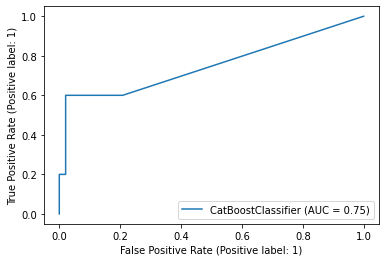

In [34]:
plot_roc_curve(boost, X_test, y_test)

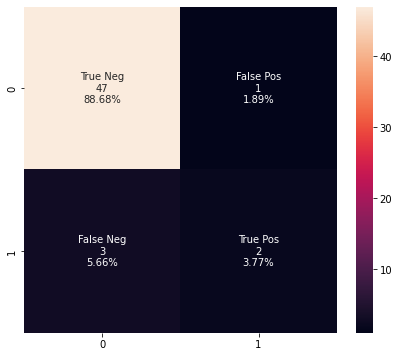

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix_cb = confusion_matrix(y_test,boost.predict(X_test))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_cb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_cb.flatten()/np.sum(cf_matrix_cb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_cb, annot=labels, fmt='')

### Бустинг до отбора признаков

In [36]:
X_normal = data.drop(columns='target')
y_normal = data['target']
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal,y_normal,test_size=0.2, random_state=12,shuffle=True)

In [37]:
boost_normal = CatBoostClassifier(eval_metric='F1',
                             verbose=False,
                             early_stopping_rounds=100,
                             iterations = 500,
                             random_seed=10)
boost_normal.fit(X_train_normal,y_train_normal)
print(accuracy_score(y_test_normal,boost_normal.predict(X_test_normal)), f1_score(y_test_normal, boost_normal.predict(X_test_normal)))

0.9622641509433962 0.7499999999999999


In [38]:
imp_df = pd.DataFrame(X_normal.columns.values)
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(boost_normal.get_feature_importance())

imp_df.sort_values(by='Importance', ascending=False).head(15)

,Feature,Importance
192,Доза.15,9.473153
191,Статин.1,4.760371
1,Возраст,2.919990
184,Доза.11,2.723484
193,БАБ.1,2.407862
199,АСК.1,2.345333
194,Доза.16,2.196764
200,Доза.19,1.962459
183,ИАПФ.1,1.756125
145,Статин,1.593921


In [39]:
X_normal.columns.values[np.where( X_normal.columns.values == 'Доза.15')[0][0]-1]

'Статин.1'

In [40]:
X_normal.columns.values[np.where( X_normal.columns.values == 'Доза.19')[0][0]-1]

'АСК.1'

In [41]:
X_normal.columns.values[np.where( X_normal.columns.values == 'Доза.11')[0][0]-1]

'ИАПФ.1'

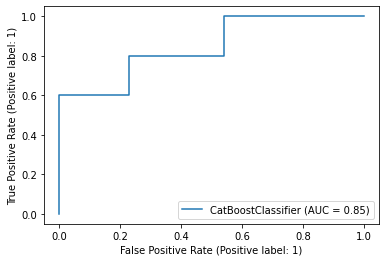

In [42]:
plot_roc_curve(boost_normal, X_test_normal, y_test_normal)

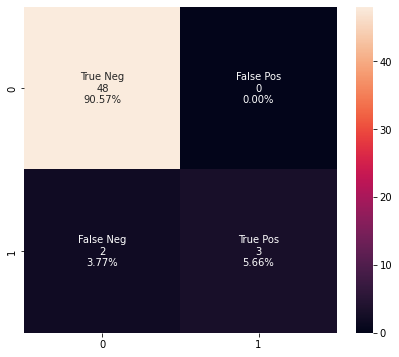

In [43]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix_cb = confusion_matrix(y_test,boost_normal.predict(X_test_normal))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_cb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_cb.flatten()/np.sum(cf_matrix_cb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_cb, annot=labels, fmt='')

### Попробуем обычную логистическую регрессию

После отбора

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logreg = LogisticRegression(n_jobs = -1, random_state = 17,penalty='l1',solver='liblinear')#lasso
logreg.fit(X_train, y_train)
logpred = logreg.predict(X_test)
print(accuracy_score(y_test,logpred), f1_score(y_test, logpred))
print(classification_report(y_test,logpred))

0.9622641509433962 0.7499999999999999
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.60      0.75         5

    accuracy                           0.96        53
   macro avg       0.98      0.80      0.86        53
weighted avg       0.96      0.96      0.96        53



До отбора

In [46]:
logreg = LogisticRegression(n_jobs = -1, random_state = 17,penalty='l1',solver='liblinear')#lasso
logreg.fit(X_train_normal, y_train_normal)
logpred = logreg.predict(X_test_normal)
print(accuracy_score(y_test_normal,logpred), f1_score(y_test_normal, logpred))
print(classification_report(y_test_normal,logpred))

0.8867924528301887 0.4000000000000001
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        48
           1       0.40      0.40      0.40         5

    accuracy                           0.89        53
   macro avg       0.67      0.67      0.67        53
weighted avg       0.89      0.89      0.89        53



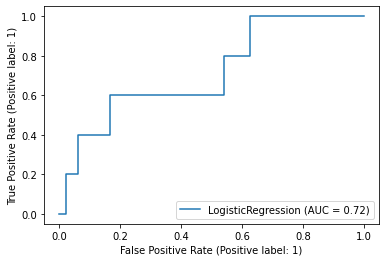

In [47]:
plot_roc_curve(logreg, X_test_normal, y_test_normal)

In [48]:
imp_df = pd.DataFrame(X_normal.columns.values)
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(logreg.coef_[0])

imp_df.sort_values(by='Importance', ascending=False).head(15)

,Feature,Importance
138,Доза,0.147915
142,Доза.2,0.137325
3,Вес,0.053412
6,систол. АД,0.045152
14,"Длительность проживания на Севере, лет",0.043572
123,УО ЛЖ,0.035003
7,ЧСС,0.033495
188,Доза.13,0.031526
198,Доза.18,0.031115
162,СКФ,0.024583


In [49]:
X_normal.columns.values[np.where( X_normal.columns.values == 'Доза.13')[0][0]-1]

'АМР.1'

Антагонисты минералокортикоидных рецепторов

Проверим бустинг на отобранных признаках

In [50]:
X_lasso = X_normal[X_normal.columns.values[logreg.coef_[0]!=0]]
y_lasso = y_normal
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso,y_lasso,test_size=0.2, random_state=17,shuffle=True)

In [51]:
boost_lasso = CatBoostClassifier(eval_metric='F1',
                             verbose=False,
                             early_stopping_rounds=100,
                             iterations = 500,
                             random_seed=10)
boost_lasso.fit(X_train_lasso,y_train_lasso)
print(accuracy_score(y_test_lasso,boost_lasso.predict(X_test_lasso)), f1_score(y_test_lasso, boost_lasso.predict(X_test_lasso)))

0.9622641509433962 0.8


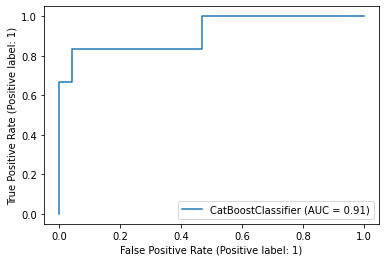

In [52]:
plot_roc_curve(boost_lasso, X_test_lasso, y_test_lasso)

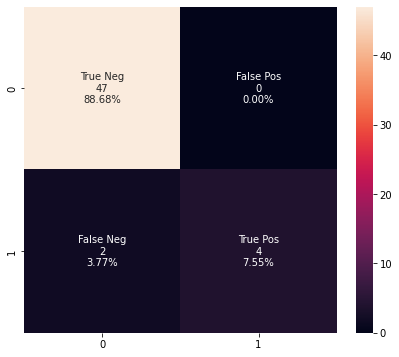

In [53]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix_cb = confusion_matrix(y_test_lasso,boost_lasso.predict(X_test_lasso))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_cb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_cb.flatten()/np.sum(cf_matrix_cb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_cb, annot=labels, fmt='')

In [81]:
imp_df = pd.DataFrame(X_lasso.columns.values)
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(boost_lasso.get_feature_importance())

imp_df.sort_values(by='Importance', ascending=False).head(15)

,Feature,Importance
28,Доза.15,15.633050
31,Доза.19,8.853531
10,СКФ EPI,8.644346
25,СКФ,5.391726
27,Доза.13,4.157738
19,Доза,4.095318
14,КДО ЛЖ,4.061590
29,Доза.16,4.049840
2,ЧСС,3.396211
16,УО ЛЖ,3.149912


### Малое количество данных и большая размерность - пробуем бутстрап и случайный лес

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.ensemble import RandomForestClassifier

params = {'bootstrap': [True],
          'max_depth': [8, None],
          'max_features': ['sqrt',0.5],
          'min_samples_split': [10,50,100],
          'max_samples': [0.7, 0.5],
          'n_estimators': [300]}

random_forest = RandomForestClassifier(random_state=10)
random_forest_cv = GridSearchCV(random_forest, params,cv = 5, scoring = 'f1',verbose=2)
random_forest_cv.fit(X_train_normal,y_train_normal)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   1.0s
[CV] EN

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'bootstrap': [True], 'max_depth': [8, None],
                         'max_features': ['sqrt', 0.5],
                         'max_samples': [0.7, 0.5],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [300]},
             scoring='f1', verbose=2)

In [56]:
random_forest_pred = random_forest_cv.predict(X_test_normal)
random_forest_cv.best_params_, random_forest_cv.best_score_

({'bootstrap': True,
  'max_depth': 8,
  'max_features': 0.5,
  'max_samples': 0.5,
  'min_samples_split': 10,
  'n_estimators': 300},
 0.7799999999999999)

In [57]:
print(accuracy_score(y_test_normal,random_forest_pred), f1_score(y_test_normal, random_forest_cv.predict(X_test_normal)))
print(classification_report(y_test_normal,random_forest_pred))

0.9622641509433962 0.7499999999999999
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.60      0.75         5

    accuracy                           0.96        53
   macro avg       0.98      0.80      0.86        53
weighted avg       0.96      0.96      0.96        53



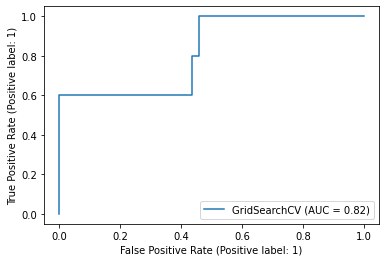

In [58]:
plot_roc_curve(random_forest_cv, X_test_normal, y_test_normal)

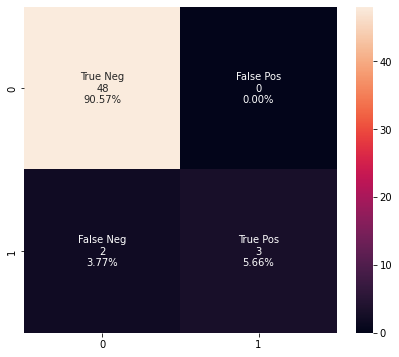

In [59]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix_cb = confusion_matrix(y_test_normal,random_forest_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_cb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_cb.flatten()/np.sum(cf_matrix_cb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_cb, annot=labels, fmt='')

In [60]:
imp_df = pd.DataFrame(X_train_normal.columns)
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(random_forest_cv.best_estimator_.feature_importances_)

imp_df.sort_values(by='Importance', ascending=False).head(15)

,Feature,Importance
192,Доза.15,0.150554
191,Статин.1,0.135860
199,АСК.1,0.066483
200,Доза.19,0.065607
193,БАБ.1,0.062482
1,Возраст,0.057447
112,"Креатинин, мкмоль/л",0.042840
145,Статин,0.036350
50,ГТЛ,0.030937
161,Креатинин 2,0.027761


In [77]:
params = {'bootstrap': [True],
          'max_depth': [8, None],
          'max_features': ['sqrt',0.5],
          'min_samples_split': [10,50,100],
          'max_samples': [0.7, 0.5],
          'n_estimators': [300]}

random_forest = RandomForestClassifier(random_state=10)
random_forest_cv = GridSearchCV(random_forest, params,cv = 5, scoring = 'f1',verbose=2)
random_forest_cv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   0.5s
[CV] EN

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'bootstrap': [True], 'max_depth': [8, None],
                         'max_features': ['sqrt', 0.5],
                         'max_samples': [0.7, 0.5],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [300]},
             scoring='f1', verbose=2)

In [78]:
random_forest_pred = random_forest_cv.predict(X_test)
random_forest_cv.best_params_, random_forest_cv.best_score_

({'bootstrap': True,
  'max_depth': 8,
  'max_features': 'sqrt',
  'max_samples': 0.5,
  'min_samples_split': 10,
  'n_estimators': 300},
 0.6933333333333334)

In [79]:
print(accuracy_score(y_test,random_forest_pred), f1_score(y_test, random_forest_cv.predict(X_test)))
print(classification_report(y_test,random_forest_pred))

0.9433962264150944 0.5714285714285715
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.40      0.57         5

    accuracy                           0.94        53
   macro avg       0.97      0.70      0.77        53
weighted avg       0.95      0.94      0.93        53



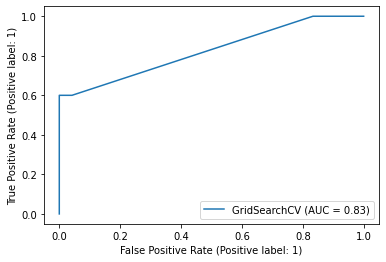

In [80]:
plot_roc_curve(random_forest_cv, X_test, y_test)

In [82]:
params = {'bootstrap': [True],
          'max_depth': [8, None],
          'max_features': ['sqrt',0.5],
          'min_samples_split': [10,50,100],
          'max_samples': [0.7, 0.5],
          'n_estimators': [300]}

random_forest = RandomForestClassifier(random_state=10)
random_forest_cv = GridSearchCV(random_forest, params,cv = 5, scoring = 'f1',verbose=2)
random_forest_cv.fit(X_train_lasso,y_train_lasso)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   0.5s
[CV] EN

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'bootstrap': [True], 'max_depth': [8, None],
                         'max_features': ['sqrt', 0.5],
                         'max_samples': [0.7, 0.5],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [300]},
             scoring='f1', verbose=2)

In [83]:
random_forest_pred = random_forest_cv.predict(X_test_lasso)
random_forest_cv.best_params_, random_forest_cv.best_score_

({'bootstrap': True,
  'max_depth': 8,
  'max_features': 0.5,
  'max_samples': 0.7,
  'min_samples_split': 10,
  'n_estimators': 300},
 0.4)

In [84]:
print(accuracy_score(y_test_lasso,random_forest_pred), f1_score(y_test_lasso, random_forest_cv.predict(X_test_lasso)))
print(classification_report(y_test_lasso,random_forest_pred))

0.9622641509433962 0.8
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.67      0.80         6

    accuracy                           0.96        53
   macro avg       0.98      0.83      0.89        53
weighted avg       0.96      0.96      0.96        53



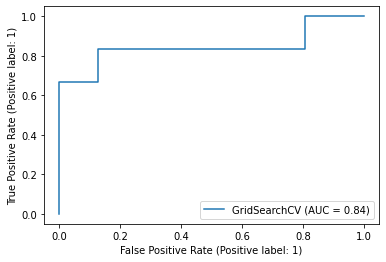

In [85]:
plot_roc_curve(random_forest_cv, X_test_lasso, y_test_lasso)

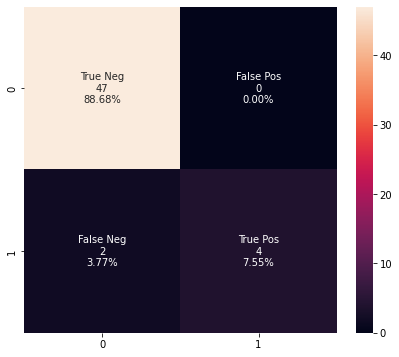

In [86]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix_cb = confusion_matrix(y_test_lasso,random_forest_cv.predict(X_test_lasso))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_cb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_cb.flatten()/np.sum(cf_matrix_cb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_cb, annot=labels, fmt='')

### Без указания дозировки

In [61]:
dose = []
for column in X_normal.columns:
  if 'Доза' in column:
    dose.append(column)

In [62]:
X_new = X_normal.drop(columns=dose)
y_new = y_normal
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.2, random_state=17,shuffle=True)

In [64]:
params = {'bootstrap': [True],
          'max_depth': [8, None],
          'max_features': ['sqrt',0.5],
          'min_samples_split': [10,50,100],
          'max_samples': [0.7, 0.5],
          'n_estimators': [300]}

random_forest = RandomForestClassifier(random_state=10)
random_forest_cv = GridSearchCV(random_forest, params,cv = 5, scoring = 'f1',verbose=2)
random_forest_cv.fit(X_train_new,y_train_new)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=50, n_estimators=300; total time=   0.5s
[CV] EN

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'bootstrap': [True], 'max_depth': [8, None],
                         'max_features': ['sqrt', 0.5],
                         'max_samples': [0.7, 0.5],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [300]},
             scoring='f1', verbose=2)

In [65]:
random_forest_pred = random_forest_cv.predict(X_test_new)
random_forest_cv.best_params_, random_forest_cv.best_score_

({'bootstrap': True,
  'max_depth': 8,
  'max_features': 0.5,
  'max_samples': 0.7,
  'min_samples_split': 10,
  'n_estimators': 300},
 0.3)

In [66]:
print(accuracy_score(y_test_new,random_forest_pred), f1_score(y_test_new, random_forest_cv.predict(X_test_new)))
print(classification_report(y_test_new,random_forest_pred))

0.9056603773584906 0.2857142857142857
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.17      0.29         6

    accuracy                           0.91        53
   macro avg       0.95      0.58      0.62        53
weighted avg       0.91      0.91      0.87        53



In [67]:
imp_df = pd.DataFrame(X_train_new.columns)
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(random_forest_cv.best_estimator_.feature_importances_)

imp_df.sort_values(by='Importance', ascending=False).head(15)

,Feature,Importance
176,Статин.1,0.175602
180,АСК.1,0.148987
7,ЧСС,0.073613
141,Статин,0.048093
172,ИАПФ.1,0.040636
115,"АСТ, U/L",0.035034
95,Шунт к ПКА,0.032724
177,БАБ.1,0.031073
174,АМР.1,0.028109
113,СКФ EPI,0.022223
